This is a demo to run Deopen

In [1]:
#glance at original data (bed format) 
!wc -l ./Deopen/demo/positive.bed
! head -n 5 ./Deopen/demo/positive.bed
!wc -l ./Deopen/demo/positive.bed
! head -n 5 ./Deopen/demo/negative.bed

10000 ./Deopen/demo/positive.bed
chr1	9995	10995	id1	1	+	.
chr1	564753	565753	id2	1	+	.
chr1	565935	566935	id3	1	+	.
chr1	567904	568904	id4	1	+	.
chr1	569403	570403	id5	1	+	.
10000 ./Deopen/demo/positive.bed
chr1	100783702	100784702	id2	1	+	.
chr1	121471114	121472114	id3	1	+	.
chr1	219901357	219902357	id4	1	+	.
chr1	26268350	26269350	id5	1	+	.
chr1	190807427	190808427	id6	1	+	.


In [2]:
#generate date for model training 
! python ./Deopen/src/Gen_data.py -pos ./Deopen/demo/positive.bed -neg ./Deopen/demo/negative.bed -genome ./genome.fa -out ./Deopen/demo/preprocessd_data.hkl       

Training data generation is finished!


In [3]:
#glance at the preprocessed data(including label, one-hot coding matrix, kmer features, etc)
import hickle as hkl
data = hkl.load('./Deopen/demo/preprocessd_data.hkl')
data.keys()

['y', 'spot', 'kmer', 'seq', 'mat']

In [4]:
#perform classification experiment
! THEANO_FLAGS='device=gpu,floatX=float32' python ./Deopen/src/Deopen_classification.py -in ./Deopen/demo/preprocessd_data.hkl -out ./Deopen/demo/Deopen_pre.hkl     

Using gpu device 0: Tesla K80 (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 5110)
/opt/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/opt/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
Using Lasagne.layers.dnn (faster)
Initializing weights (1/5) ...
Initializing weights (2/5) ...
Initializing weights (3/5) ...
Initializing weights (4/5) ...
Initializing weights (5/5) ...
Loading pre-training weights...
Loaded parameters to layer 'conv2ddnn2' (shape 128x1x4x13).
Loaded parameters to layer 'conv2ddnn2' (shape 128).
Loaded parameters to layer 'conv2ddnn3' (shape 128x12

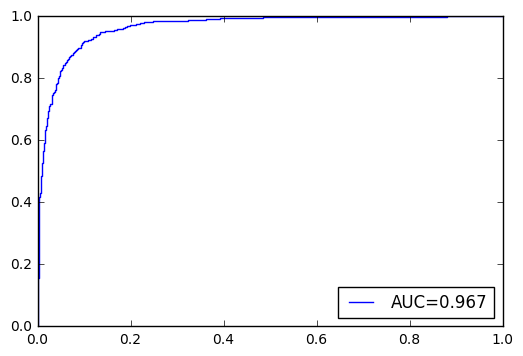

In [5]:
#evaluate performance using ROC curve
import hickle as hkl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
[y_prob,y_test] = hkl.load('./Deopen/demo/Deopen_pre.hkl')
AUC = metrics.roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(fpr,tpr,label='AUC=%1.3f'%AUC)
plt.legend(loc=4) 
plt.show()